# Import packages

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats

%matplotlib inline

# Panel B

In [6]:
def fit_linear(time, data, end_aver, aver, ending=-1):
    # Does linear fit and returns the slope in min
    
    
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(time.values[-end_aver:ending].reshape(-1, 1), data[-end_aver:ending].reshape(-1, 1))  # perform linear regression
    m = linear_regressor.coef_
    b = linear_regressor.intercept_
    
    lag_s = (aver - b)/m 
    lag_m = lag_s / 60.


    return lag_m

In [77]:
# Data
alix_results = pd.read_excel('data_wt.xlsx')
alix_results_mut = pd.read_excel('data_mut.xlsx')

In [78]:
# wildtype
time = alix_results.T[0][2:]   

wt_1 = alix_results.T[30][2:].values.astype(float)
wt_2 = alix_results.T[31][2:].values.astype(float)
wt_3 = alix_results.T[32][2:].values.astype(float)
wt_4 = alix_results.T[33][2:].values.astype(float)
wt_5 = alix_results.T[34][2:].values.astype(float)
wt_6 = alix_results.T[35][2:].values.astype(float)

# get base line value by taking the average of the fist x points
averager = 5
end_aver = 40
ending = -30

av_1 = np.mean(wt_1[:averager])
av_2 = np.mean(wt_2[:averager])
av_3 = np.mean(wt_3[:averager])
av_4 = np.mean(wt_4[:averager])
av_5 = np.mean(wt_5[:averager])
av_6 = np.mean(wt_6[:averager])

# get final growth rate by the fitting the last part of the data
# calculate intercept 
m_1 = fit_linear(time, wt_1_log, end_aver, av_1, ending=ending)
m_2 = fit_linear(time, wt_2_log, end_aver, av_2, ending=ending)
m_3 = fit_linear(time, wt_3_log, end_aver, av_3, ending=ending)
m_4 = fit_linear(time, wt_4_log, end_aver, av_4, ending=ending)
m_5 = fit_linear(time, wt_5_log, end_aver, av_5, ending=ending)
m_6 = fit_linear(time, wt_6_log, end_aver, av_6, ending=ending)

mean_starve = np.mean([m_1, m_2, m_3])
std_starve = np.std([m_1, m_2, m_3])
mean_nostarve = np.mean([m_4, m_5, m_6])
std_nostarve = np.std([m_4, m_5, m_6])

In [79]:
# for mutant 

mut_1 = alix_results_mut.T[37][1:].values.astype(float)
mut_2 = alix_results_mut.T[38][1:].values.astype(float)
mut_3 = alix_results_mut.T[39][1:].values.astype(float)
mut_4 = alix_results_mut.T[40][1:].values.astype(float)
mut_5 = alix_results_mut.T[41][1:].values.astype(float)
mut_6 = alix_results_mut.T[42][1:].values.astype(float)


# get base line value by taking the average of the fist x points
# remove the very first datapoint, because of artefacts 
averager = 20
end_aver = 15
start_data = 1

av_1 = np.mean(mut_1[start_data:averager])
av_2 = np.mean(mut_2[start_data:averager])
av_3 = np.mean(mut_3[start_data:averager])
av_4 = np.mean(mut_4_log[start_data:averager])
av_5 = np.mean(mut_5[start_data:averager])
av_6 = np.mean(mut_6[start_data:averager])

# get final gromuth rate by the fitting the last part of the data
# calculate intercept 
m_mut_1 = fit_linear(time, mut_1_log, end_aver, av_1)
m_mut_2 = fit_linear(time, mut_2_log, end_aver, av_2)
m_mut_3 = fit_linear(time, mut_3_log, end_aver, av_3)
m_mut_4 = fit_linear(time, mut_4_log, end_aver, av_4)
m_mut_5 = fit_linear(time, mut_5_log, end_aver, av_5)
m_mut_6 = fit_linear(time, mut_6_log, end_aver, av_6)

# mutant 2 was contaminated and therfore removed from subsequent analysis
mean_mut_starve = np.mean([m_mut_1,  m_mut_3])
std_mut_starve = np.std([m_mut_1,  m_mut_3])
mean_mut_nostarve = np.mean([m_mut_4, m_mut_5, m_mut_6])
std_mut_nostarve = np.std([m_mut_4, m_mut_5, m_mut_6])

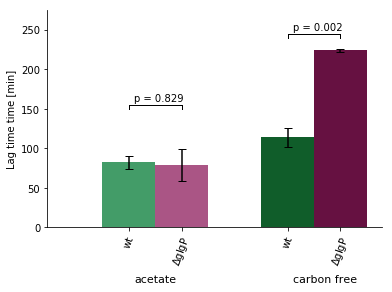

In [80]:
# same plot with stars

fig, ax = plt.subplots()
ind = np.arange(1)  # the x locations for the groups
width = 0.2       # the width of the bars

rects2 = ax.bar(ind , mean_nostarve, width, color='#439C68', yerr=std_nostarve, capsize = 4)
rects2 = ax.bar(0.3,0)

rects4 = ax.bar(ind + 3*width, mean_starve, width, color='#105D2A', yerr=std_starve, capsize = 4)
rects4 = ax.bar(0.15,0)

rects1 = ax.bar(ind + 1*width, mean_mut_nostarve, width, color='#AA5585', yerr=std_mut_nostarve, capsize = 4)

rects3 = ax.bar(ind + 4*width, mean_mut_starve, width, color='#661141', yerr=std_mut_starve, capsize = 4)
rects3 = ax.bar(0.15,0)
# add some text for labels, title and axes ticks
plt.xticks(rotation=70)
ax.set_ylabel('Lag time time [min]')
ax.set_xticks([ind, ind+width, ind + 3*width,  ind + 4*width] )
ax.set_xticklabels(['wt', r'$\Delta$glgP', 'wt', r'$\Delta$glgP'])

# add significant level 
#'wt starve nostarve'
sig_wt = "p = " + str(round(stats.ttest_ind([m_1, m_2, m_3],[m_4, m_5, m_6]).pvalue[0][0],3))
# mut starve nostarve
sig_mut = "p = " + str(round(stats.ttest_ind([m_mut_1, m_mut_3],[m_mut_4, m_mut_5, m_mut_6]).pvalue[0][0],3))
#'compare starved'
sig_starve = "p = " + str(round(stats.ttest_ind([m_mut_1, m_mut_3],[m_1, m_2, m_3]).pvalue[0][0],3))
#'compare no starved')
sig_nostarve = "p = " + str(round(stats.ttest_ind([m_4, m_5, m_6],[m_mut_4, m_mut_5, m_mut_6]).pvalue[0][0],3))



ax.plot([ind, ind + 1 * width], [155, 155], 'k-', lw=1)
ax.plot([ind, ind ], [150, 155], 'k-', lw=1)
ax.plot([ind+ 1 *width, ind+ 1 *width ], [150, 155], 'k-', lw=1)
ax.text(ind + 0.1 * width, 159, sig_nostarve)

ax.plot([ind+ 3 * width, ind + 4 * width], [245, 245], 'k-', lw=1)
ax.plot([ind+ 3 * width, ind+ 3 * width ], [240, 245], 'k-', lw=1)
ax.plot([ind+ 4 *width, ind+ 4 *width ], [240, 245], 'k-', lw=1)
ax.text(ind+  3.1 * width, 249, sig_starve)

ax.text(ind+  0.1 * width, -70,'acetate', fontsize=11)
ax.text(ind+  3.1 * width, -70,'carbon free', fontsize=11)


ax.set_ylim(0,275)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('Figure_4_PanelB.pdf', bbox_inches='tight' )

# Panel C

In [68]:
# data
times_wt_before = np.array( [15, 31, 61, 91, 119, 232, 307, 355]) 
times_wt_after = np.array( [8, 36, 100, 172, 239, 274, 308 ]) 
times_glgP_before = np.array( [15, 33, 64, 93, 117, 240, 312, 357, 397]) 
times_glgP_after = np.array( [13, 43, 105, 179, 239, 274, 316]) 
times_glgP_before = times_glgP_before - times_glgP_before[0]

wt_before_starve_1 = np.array([ 0.124, 0.123, 0.123, 0.134, 0.146, 0.181, 0.231, 0.267]) *2
wt_before_starve_2 = np.array([0.117, 0.119, 0.132, 0.130, 0.143, 0.181, 0.230, 0.266]) *2
wt_before_starve_3 = np.array([ 0.119, 0.118, 0.119, 0.126, 0.136, 0.166, 0.223, 0.262]) *2

wt_after_starve_1 = np.array([ 0.245, 0.268, 0.326, 0.416, 2*0.29, 2*0.349, 2*0.396]) *2
wt_after_starve_2 = np.array([ 0.264, 0.286,0.342, 0.438, 2*0.301, 2*0.351, 2*0.399]) *2
wt_after_starve_3 = np.array([ 0.261, 0.281, 0.332, 0.406, 2*0.311, 2*0.36, 2*0.416]) *2


glgP_before_starve_1 = np.array([ 0.119, 0.124,  0.128, 0.130, 0.142, 0.162, 0.173, 0.202, 0.210 ]) *2
glgP_before_starve_2 = np.array([ 0.113, 0.118, 0.125, 0.125, 0.132, 0.145, 0.157, 0.169, 0.182 ]) *2
glgP_before_starve_3 = np.array([ 0.12, 0.122, 0.126, 0.128, 0.136, 0.151, 0.162, 0.173, 0.191]) *2

glgP_after_starve_1 = np.array([ 0.2165, 0.245, 0.259, 0.281, 0.303, 0.332, 2*0.198]) *2
glgP_after_starve_2 = np.array([ 0.2135, 0.236, 0.252, 0.268, 0.292, 0.306, 2*0.181]) *2
glgP_after_starve_3 = np.array([ 0.209, 0.237, 0.245, 0.267, 0.290, 0.308, 2*0.181]) *2

In [69]:
# calculate when growth rate obtained by last three points reaces mean level level of three points


# lag time wt_before
z_1 = np.polyfit(times_wt_before[-3:], np.log2(wt_before_starve_1[-3:]),1)
lag_wt_before_1  = (np.mean(np.log2(wt_before_starve_1[0])) - z_1[1]) / z_1[0]

z_2 = np.polyfit(times_wt_before[-3:], np.log2(wt_before_starve_2[-3:]),1)
lag_wt_before_2  = (np.mean(np.log2(wt_before_starve_2[0])) - z_2[1]) / z_2[0]

z_3 = np.polyfit(times_wt_before[-3:], np.log2(wt_before_starve_3[-3:]),1)
lag_wt_before_3  = (np.mean(np.log2(wt_before_starve_3[0])) - z_3[1]) / z_3[0]

# lag time wt_after
z_1 = np.polyfit(times_wt_after[-3:], np.log2(wt_after_starve_1[-3:]),1)
lag_wt_after_1  = (np.log2(wt_after_starve_1[0]) - z_1[1]) / z_1[0]

z_2 = np.polyfit(times_wt_after[-3:], np.log2(wt_after_starve_2[-3:]),1)
lag_wt_after_2  = (np.log2(wt_after_starve_2[0]) - z_2[1]) / z_2[0]

z_3 = np.polyfit(times_wt_after[-3:], np.log2(wt_after_starve_3[-3:]),1)
lag_wt_after_3  = (np.log2(wt_after_starve_3[0]) - z_3[1]) / z_3[0]


# lag time glgP_before
z_1 = np.polyfit(times_glgP_before[-3:], np.log2(glgP_before_starve_1[-3:]),1)
lag_glgP_before_1  = (np.mean(np.log2(glgP_before_starve_1[1])) - z_1[1]) / z_1[0]

z_2 = np.polyfit(times_glgP_before[-3:], np.log2(glgP_before_starve_2[-3:]),1)
lag_glgP_before_2  = (np.mean(np.log2(glgP_before_starve_1[0])) - z_2[1]) / z_2[0]

z_3 = np.polyfit(times_glgP_before[-3:], np.log2(glgP_before_starve_3[-3:]),1)
lag_glgP_before_3  = (np.mean(np.log2(glgP_before_starve_1[0])) - z_3[1]) / z_3[0]

# lag time glgP_after
z_1 = np.polyfit(times_glgP_after[-3:], np.log2(glgP_after_starve_1[-3:]),1)
lag_glgP_after_1  = (np.mean(np.log2(glgP_after_starve_1[0])) - z_1[1]) / z_1[0]

z_2 = np.polyfit(times_glgP_after[-3:], np.log2(glgP_after_starve_2[-3:]),1)
lag_glgP_after_2  = (np.mean(np.log2(glgP_after_starve_1[0])) - z_2[1]) / z_2[0]

z_3 = np.polyfit(times_glgP_after[-3:], np.log2(glgP_after_starve_3[-3:]),1)
lag_glgP_after_3  = (np.mean(np.log2(glgP_after_starve_1[0])) - z_3[1]) / z_3[0]

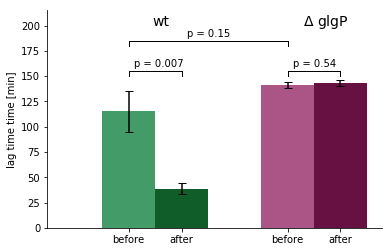

In [71]:

fig, ax = plt.subplots()
ind = np.arange(1)  # the x locations for the groups
width = 0.2       # the width of the bars

rects1 = ax.bar(ind + 3*width, np.mean([lag_glgP_before_1, lag_glgP_before_2, lag_glgP_before_3]), width, color='#AA5585', yerr=np.std([lag_glgP_before_1, lag_glgP_before_2, lag_glgP_before_3]), capsize = 4)

rects2 = ax.bar(ind , np.mean([lag_wt_before_1, lag_wt_before_2, lag_wt_before_3]), width, color='#439C68', yerr=np.std([lag_wt_before_1, lag_wt_before_2, lag_wt_before_3]), capsize = 4)
rects2 = ax.bar(0.3,0)

rects3 = ax.bar(ind + 4*width, np.mean([lag_glgP_after_1, lag_glgP_after_2, lag_glgP_after_3]), width, color='#661141', yerr=np.std([lag_glgP_after_1, lag_glgP_after_2, lag_glgP_after_3]), capsize = 4)
rects3 = ax.bar(0.15,0)

rects4 = ax.bar(ind + 1*width, np.mean([lag_wt_after_1, lag_wt_after_2, lag_wt_after_3]), width, color='#105D2A', yerr=np.std([lag_wt_after_1, lag_wt_after_2, lag_wt_after_3]), capsize = 4)
rects4 = ax.bar(0.15,0)

# add some text for labels, title and axes ticks

ax.set_ylabel('lag time time [min]')
ax.set_xticks([ind, ind+width, ind + 3*width,  ind + 4*width] )
ax.set_xticklabels(['before', 'after', 'before', 'after'])

# statistics

sig_wt = "p = " + str(round(stats.ttest_ind([lag_wt_before_1, lag_wt_before_2, lag_wt_before_3],[lag_wt_after_1, lag_wt_after_2, lag_wt_after_3])[1],3))
sig_glgP = "p = " + str(round(stats.ttest_ind([lag_glgP_before_1, lag_glgP_before_2, lag_glgP_before_3],[lag_glgP_after_1, lag_glgP_after_2, lag_glgP_after_3])[1],2))
sig_before = "p = " + str(round(stats.ttest_ind([lag_wt_before_1, lag_wt_before_2, lag_wt_before_3],[lag_glgP_before_1, lag_glgP_before_2, lag_glgP_before_3])[1],2))

# add significant level 
ax.plot([ind, ind + 1 * width], [155, 155], 'k-', lw=1)
ax.plot([ind, ind ], [150, 155], 'k-', lw=1)
ax.plot([ind+ 1 *width, ind+ 1 *width ], [150, 155], 'k-', lw=1)
ax.text(ind + 0.1 * width, 159, sig_wt)

ax.plot([ind+ 3 * width, ind + 4 * width], [155, 155], 'k-', lw=1)
ax.plot([ind+ 3 * width, ind+ 3 * width ], [150, 155], 'k-', lw=1)
ax.plot([ind+ 4 *width, ind+ 4 *width ], [150, 155], 'k-', lw=1)
ax.text(ind+  3.1 * width, 159, sig_glgP)

ax.plot([ind, ind + 3 * width], [185, 185], 'k-', lw=1)
ax.plot([ind, ind ], [180, 185], 'k-', lw=1)
ax.plot([ind+ 3 *width, ind+ 3 *width ], [180, 185], 'k-', lw=1)
ax.text(ind + 1.1 * width, 189, sig_before)


ax.text(ind + 0.45*width, 200, "wt",  fontsize=14)
ax.text(ind + 3.3*width, 200, r'$\Delta$ glgP',  fontsize=14)
ax.set_ylim(0, 215)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('Figure_4_PanelC.pdf' )




# Panel C

In [72]:
time_points = [1,30,60,90,120,180,240,360,360+15*60+40]

wt_1 = np.array([0.198, 0.176, 0.144, 0.112, 0.094, 0.089, 0.056, 0.047, 0.014])
wt_2 = np.array([0.11, 0.103, 0.105, 0.093, 0.086, 0.082, 0.071, 0.057, 0.021])
wt_3 = np.array([0.203, 0.168, 0.161, 0.13, 0.111, 0.063, 0.06, 0.042, 0.014])

glgP_1 = np.array([0.204, 0.246, 0.238, 0.224, 0.226, 0.212, 0.22, 0.194, 0.198])
glgP_2 = np.array([0.133, 0.121, 0.134, 0.134, 0.122, 0.118, 0.118, 0.108, 0.089])
glgP_3 = np.array([0.13, 0.122, 0.126, 0.12, 0.121, 0.113, 0.118, 0.094, 0.077])

glgA_1 = np.array([0.237, 0.219, 0.231, 0.203, 0.209, 0.212, 0.225, 0.181, 0.119])
glgA_2 = np.array([0.157, 0.198, 0.217, 0.21, 0.201, 0.209, 0.213, 0.174, 0.14])
glgA_3 = np.array([0.241, 0.214, 0.231, 0.218, 0.203, 0.211, 0.195, 0.153, 0.13])

In [73]:
# scale to 100% at the beginning 
wt_1_scale = wt_1/wt_1[0]
wt_2_scale = wt_2/wt_2[0]
wt_3_scale = wt_3/wt_3[0]

wt_mean = np.array([np.mean([wt_1_scale[m], wt_2_scale[m], wt_3_scale[m]]) for m in range(len(wt_1_scale))])*100
wt_stderr = np.array([stats.sem([wt_1_scale[m], wt_2_scale[m], wt_3_scale[m]]) for m in range(len(wt_1_scale))])*100


glgP_1_scale = glgP_1/glgP_1[0]
glgP_2_scale = glgP_2/glgP_2[0]
glgP_3_scale = glgP_3/glgP_3[0]

glgP_mean = np.array([np.mean([glgP_1_scale[m], glgP_2_scale[m], glgP_3_scale[m]]) for m in range(len(glgP_1_scale))])*100
glgP_stderr = np.array([stats.sem([glgP_1_scale[m], glgP_2_scale[m], glgP_3_scale[m]]) for m in range(len(glgP_1_scale))])*100


glgA_1_scale = glgA_1/glgA_1[0]
glgA_2_scale = glgA_2/glgA_2[0]
glgA_3_scale = glgA_3/glgA_3[0]

glgA_mean = np.array([np.mean([glgA_1_scale[m], glgA_2_scale[m], glgA_3_scale[m]]) for m in range(len(glgA_1_scale))])*100
glgA_stderr = np.array([stats.sem([glgA_1_scale[m], glgA_2_scale[m], glgA_3_scale[m]]) for m in range(len(glgA_1_scale))])*100

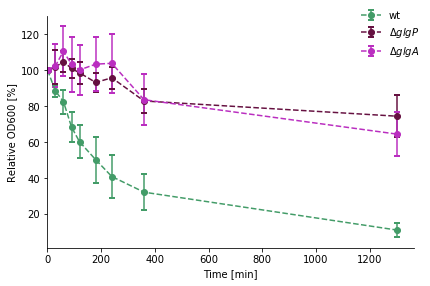

In [74]:
fig, ax = plt.subplots()

ax.errorbar(time_points, wt_mean,yerr=wt_stderr, fmt='--o', capthick=2, capsize=3, label='wt', color='#439C68' )
ax.errorbar(time_points, glgP_mean,yerr=glgP_stderr, fmt='--o', capthick=2, capsize=3, label=r'$\Delta glgP$', color='#661141')
ax.errorbar(time_points, glgA_mean,yerr=glgA_stderr, fmt='--o', capthick=2, capsize=3, label=r'$\Delta glgA$', color='#BA2EC0')


ax.set_xlabel('Time [min]')
ax.set_ylabel('Relative OD600 [%]')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
leg = plt.legend(bbox_to_anchor=(1, 1),bbox_transform=plt.gcf().transFigure)
leg.get_frame().set_linewidth(0.0)
ax.set_xlim(0)
fig.tight_layout()
fig.savefig('Figure_4_PanelD.pdf' )